In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
columns=["Class","Age","Menopause","Tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"]

df=pd.read_csv("breast-cancer.csv",names=columns)
print(df)

                    Class    Age Menopause Tumor-size inv-nodes node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence-events  60-69      ge40      20-24       0-2        no   
284     recurrence-events  40-49      ge40      30-34       3-5        no   
285     recurrence-events  50-59      ge40      30-34       3-5        no   

     deg-malig breast breast-quad irradiat  
0            3   left    left_

In [26]:
df.head()

,Class,Age,Menopause,Tumour-size,inv,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [27]:
df.dtypes

Class          object
Age            object
Menopause      object
Tumour-size    object
inv            object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [28]:
df.shape

(286, 10)

In [29]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Class,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events
Age,30-39,40-49,40-49,60-69,40-49,60-69,50-59,60-69,40-49,40-49
Menopause,premeno,premeno,premeno,ge40,premeno,ge40,premeno,ge40,premeno,premeno
Tumour-size,30-34,20-24,20-24,15-19,0-4,15-19,25-29,20-24,50-54,20-24
inv,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2
node-caps,no,no,no,no,no,no,no,no,no,no
deg-malig,3,2,2,2,2,2,2,1,2,2
breast,left,right,left,right,right,left,left,left,left,right
breast-quad,left_low,right_up,left_low,left_up,right_low,left_low,left_low,left_low,left_low,left_up
irradiat,no,no,no,no,no,no,no,no,no,no


LIST OF UNIQUE VALUES

In [43]:
for col in df.select_dtypes(include=['object']).columns:
    unique_vals=df[col].dropna().unique()
    print(f"Column '{col}' ({len(unique_vals)} unique values):")
    print(unique_vals)
    print("-" * 50)

Column 'Class' (2 unique values):
['no-recurrence-events' 'recurrence-events']
--------------------------------------------------
Column 'Age' (6 unique values):
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
--------------------------------------------------
Column 'Menopause' (3 unique values):
['premeno' 'ge40' 'lt40']
--------------------------------------------------
Column 'Tumor-size' (11 unique values):
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
--------------------------------------------------
Column 'inv' (7 unique values):
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
--------------------------------------------------
Column 'node-caps' (3 unique values):
['no' 'yes' '?']
--------------------------------------------------
Column 'breast' (2 unique values):
['left' 'right']
--------------------------------------------------
Column 'breast-quad' (6 unique values):
['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
-

MISSING VALUES

In [44]:
for col in df.columns:
    q_count=df[col][df[col]=='?'].count()
    nan_count=df[col].isna().sum()
    total_missing = q_count + nan_count
    if total_missing:
        print(f"Column '{col}': ? = {q_count}, Nan = {nan_count}, Total missing = {total_missing}")

Column 'node-caps': ? = 8, Nan = 0, Total missing = 8
Column 'breast-quad': ? = 1, Nan = 0, Total missing = 1


In [45]:
import numpy as np

df_missing=df.replace("?",np.nan)
missing_proportions=df_missing.isna().mean()

for col,prop in missing_proportions.items():
    if prop:
        print(f"Column '{col}' : {prop:.2%} missing (include '?')")


Column 'node-caps' : 2.80% missing (include '?')
Column 'breast-quad' : 0.35% missing (include '?')


In [33]:
df.shape

(286, 10)

EDA

<function matplotlib.pyplot.show(close=None, block=None)>

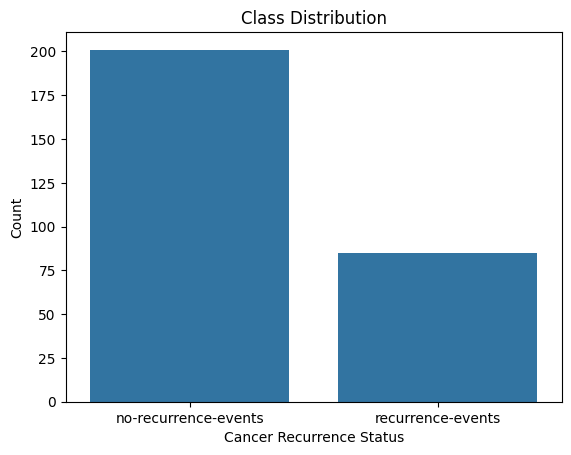

In [46]:
plt.Figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title("Class Distribution")
plt.xlabel("Cancer Recurrence Status")
plt.ylabel("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

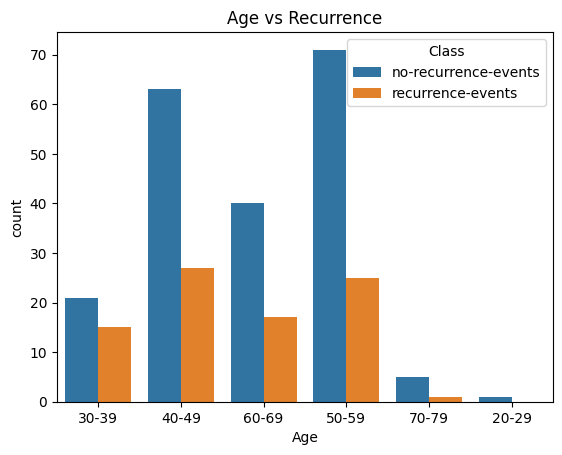

In [47]:
plt.Figure(figsize=(8,4))
sns.countplot(x='Age',hue='Class',data=df)
plt.title("Age vs Recurrence")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

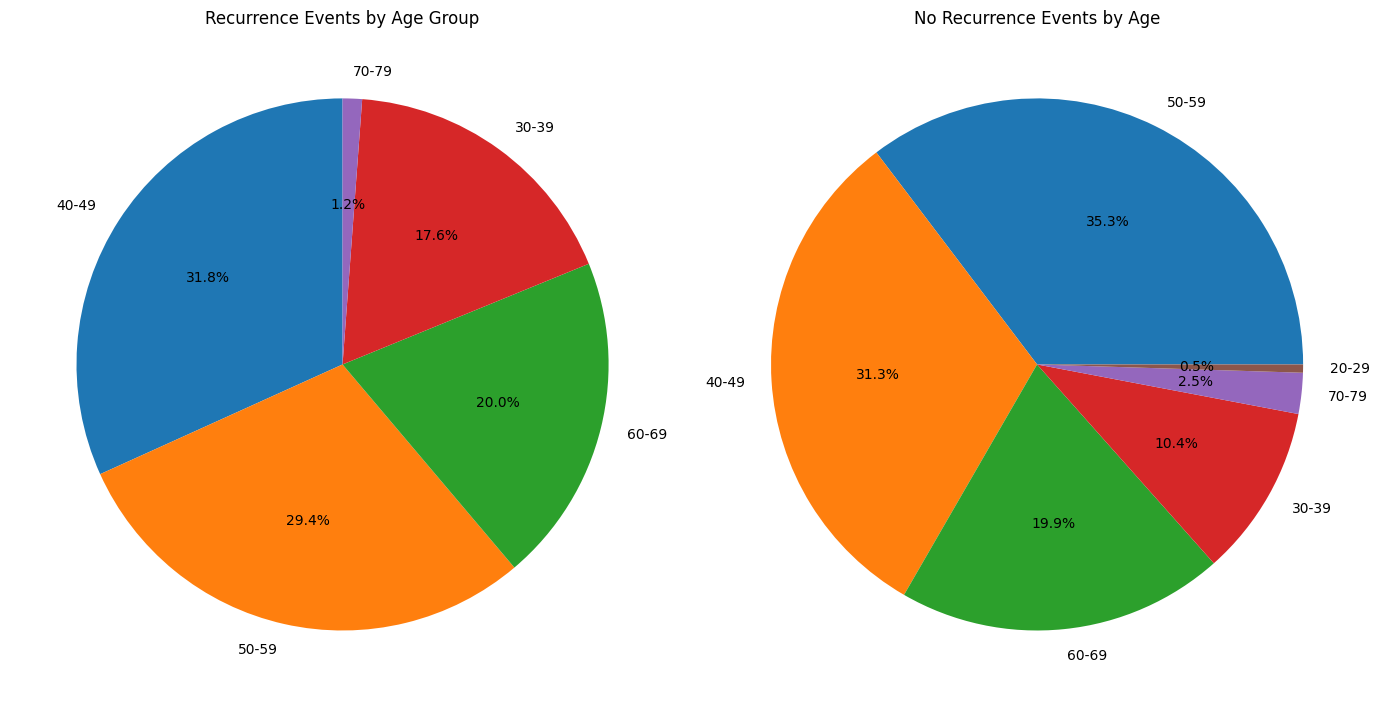

In [48]:
age_recurrence=df[df['Class']=='recurrence-events']['Age'].value_counts()
age_no_recurrence=df[df['Class']=='no-recurrence-events']['Age'].value_counts()

[fig,axes]=plt.subplots(1,2,figsize=(14,16))

axes[0].pie(age_recurrence,labels = age_recurrence.index,autopct='%1.1f%%',startangle=90)
axes[0].set_title("Recurrence Events by Age Group")

axes[1].pie(age_no_recurrence,labels=age_no_recurrence.index,autopct='%1.1f%%')
axes[1].set_title("No Recurrence Events by Age")
plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

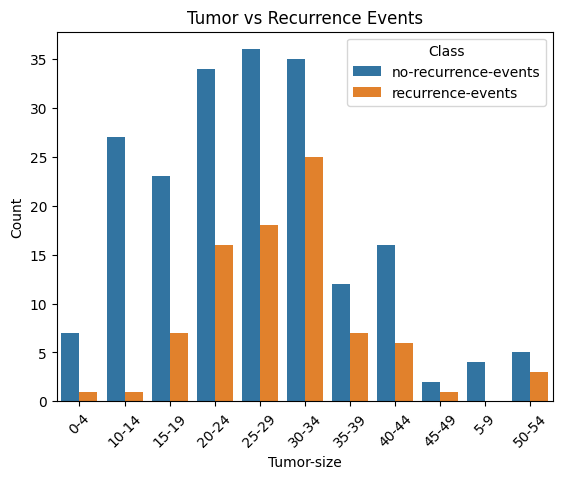

In [49]:
plt.Figure(figsize=(10,5))
sns.countplot(x='Tumor-size',hue='Class',data=df,order=sorted(df['Tumor-size'].unique()))
plt.title("Tumor vs Recurrence Events")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

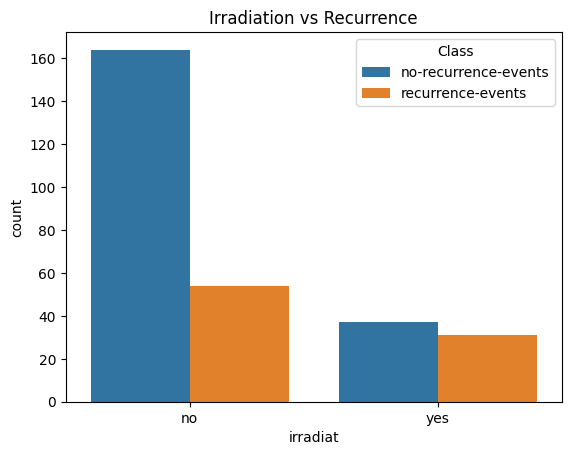

In [50]:
plt.Figure(figsize=(6,4))
sns.countplot(x='irradiat',hue='Class',data=df)
plt.title("Irradiation vs Recurrence")
plt.show

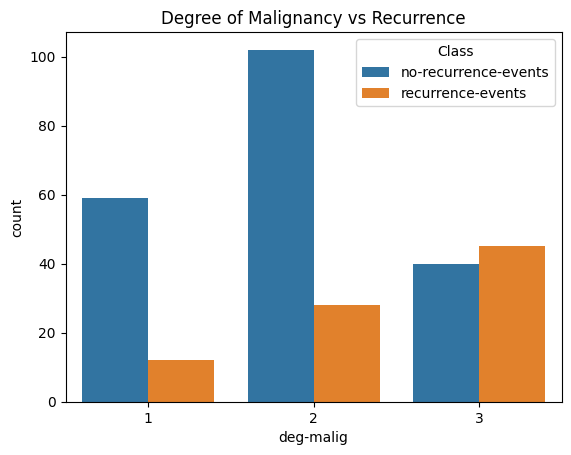

In [51]:
plt.Figure(figsize=(6,4))
sns.countplot(x='deg-malig',hue='Class',data=df)
plt.title("Degree of Malignancy vs Recurrence")
plt.show()

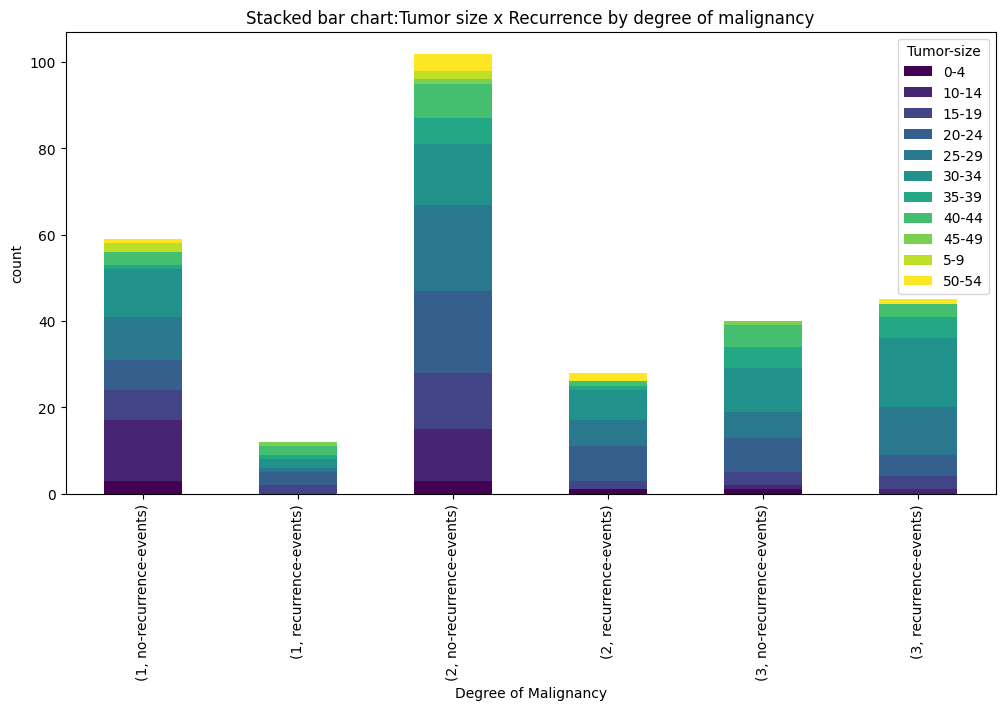

In [52]:
grouped = df.groupby(['deg-malig','Class','Tumor-size']).size().unstack(fill_value=0)
grouped.plot(kind='bar',stacked=True,figsize=(12,6),colormap='viridis')
plt.title("Stacked bar chart:Tumor size x Recurrence by degree of malignancy")
plt.xlabel("Degree of Malignancy")
plt.ylabel("count")
plt.legend(title="Tumor-size")
plt.show()

In [56]:
df['Class'] = df['Class'].map({'no-recurrence-events': 0,'recurrence-events': 1})
                             
df['node-caps'] = df['node-caps'].map({'no': 0,'yes':1})
df['irradiat'] = df['irradiat'].map({'no': 0,'yes': 1})
df['breast'] = df['breast'].map({'left':0,'right':1})

age_map = {val: i for i,val in enumerate(sorted(df['Age'].unique()))} 
tsize_map = {val:i for i ,val in enumerate(sorted(df['Tumor-size'].unique()))}
inv_nodes_map = {val: i for i ,val in enumerate(sorted(df['inv-nodes'].unique()))}

print(age_map)
print(tsize_map)
print(inv_nodes_map)

df['Age'] = df['Age'].map(age_map)
df['Tumor-size'] = df['Tumor-size'].map(tsize_map)
df['inv-nodes'] = df['inv-nodes'].map(inv_nodes_map)

df['deg-malig'] = pd.to_numeric(df['deg-malig'])

df_processed = pd.get_dummies(df,columns=['Menopause','breast-quad'],drop_first=True, dtype=int)
df_processed

{'20-29': 0, '30-39': 1, '40-49': 2, '50-59': 3, '60-69': 4, '70-79': 5}
{'0-4': 0, '10-14': 1, '15-19': 2, '20-24': 3, '25-29': 4, '30-34': 5, '35-39': 6, '40-44': 7, '45-49': 8, '5-9': 9, '50-54': 10}
{'0-2': 0, '12-14': 1, '15-17': 2, '24-26': 3, '3-5': 4, '6-8': 5, '9-11': 6}


,Class,Age,Tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,Menopause_lt40,Menopause_premeno,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,0,1,5,0,0.0,3,0,0,0,1,0,1,0,0,0
1,0,2,3,0,0.0,2,1,0,0,1,0,0,0,0,1
2,0,2,3,0,0.0,2,0,0,0,1,0,1,0,0,0
3,0,4,2,0,0.0,2,1,0,0,0,0,0,1,0,0
4,0,2,0,0,0.0,2,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,1,5,0,0.0,2,0,0,0,1,0,0,1,0,0
282,1,1,3,0,0.0,3,0,1,0,1,0,0,1,0,0
283,1,4,3,0,0.0,1,1,0,0,0,0,0,1,0,0
284,1,2,5,4,0.0,3,0,0,0,0,0,1,0,0,0


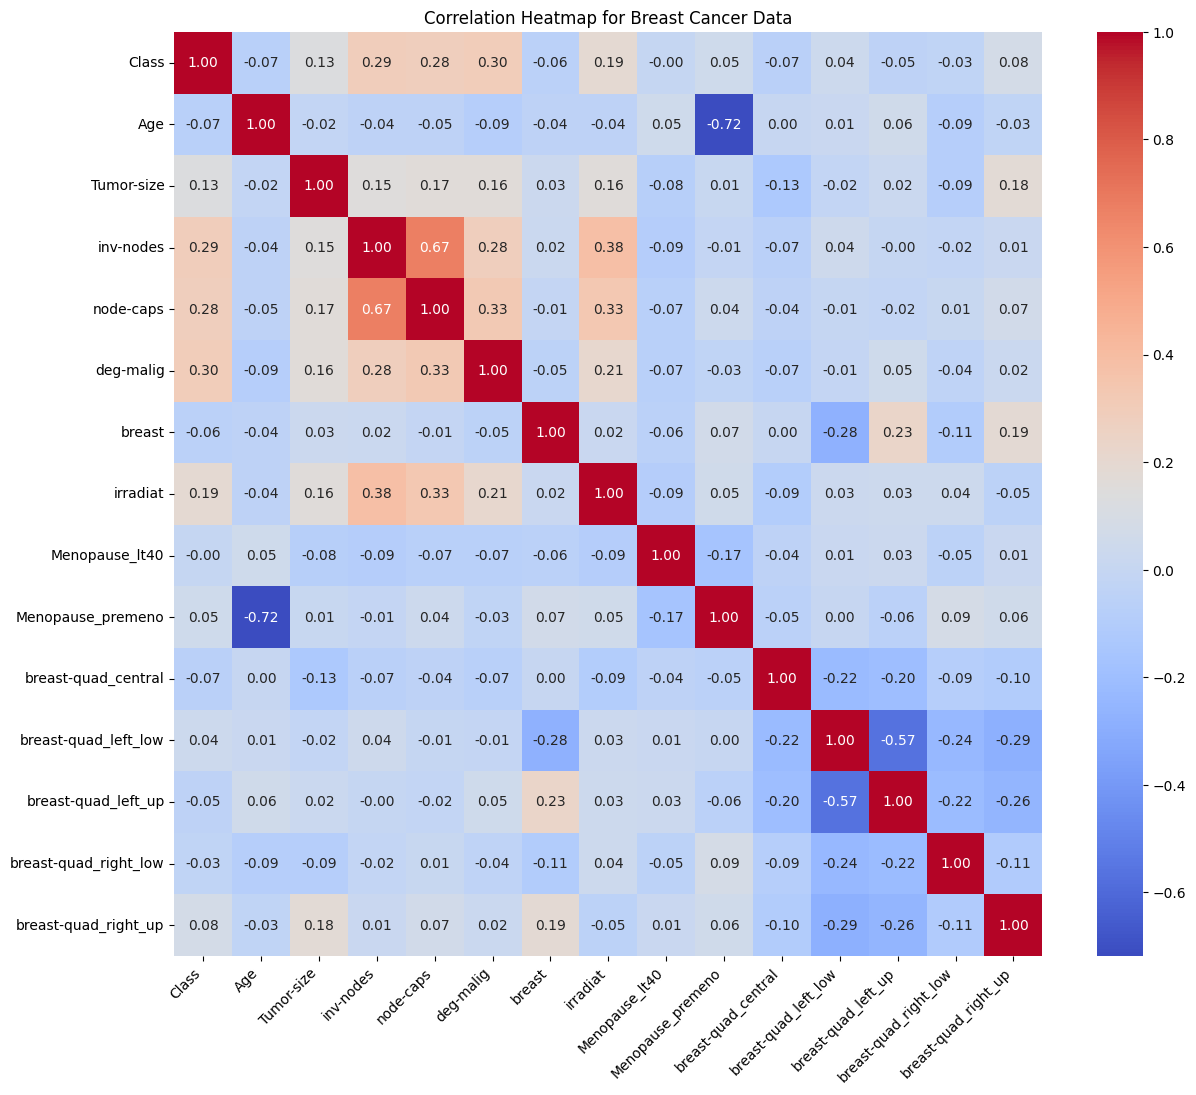

In [57]:
corr_matrix = df_processed.corr()

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm')
plt.title('Correlation Heatmap for Breast Cancer Data')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.show()